# Analysis of No-Show Doctor appointments

###  Dataset Description: 
The researched dataset has information from more than 100 000 medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
Link: https://www.kaggle.com/joniarroba/noshowappointments&sa=D&ust=1523460017117000

### Questions to be answered:
Try and suggest questions that promote looking at relationships between
multiple variables. You should aim to analyze at least one dependent variable and three independent variables in your investigation. Make sure you use NumPy and Pandas where they are appropriate!

#### Analysis: 
1. How is the distribution of appointments per patient?
2. How many patients are alcoholic, relative and absolute?
3. Does alcoholism influence no-show appointments?

#### Methodology:
* Data Wrangling
* Exploration
* Conclusion
* Communication

Exploration Remarks: The project uses NumPy arrays and Pandas Series and DataFrames where appropriate rather than Python lists and dictionaries. Where possible, vectorized operations and built-in functions are used instead of loops. The project investigates the stated question(s) from multiple angles. At least three variables are investigated using both single-variable (1d) and multiple-variable (2d) explorations. The project's visualizations are varied and show multiple comparisons and trends. Relevant statistics are computed throughout the analysis when an inference is made about the data. At least two kinds of plots are created as part of the explorations.

#Data Wrangling: 

The data wrangling process start with importing the necessary libraries and packages.

In [13]:
##Importing packages

import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sb

Then the dataset 'noshowappointments' from Kaggle is imported and parsed for a first impression.

In [14]:
## Importing the raw data

data = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Raw Data Dictionary
This dictionary explains the meanings of all columns of the raw data.

* PatientId = Identification Number of a patient 
* AppointmentID = Identification Number of each appointment 
* Gender = Male or Female  
* ScheduledDay = The day someone asked for the appointment
* AppointmentDay = The day of the appointment
* Age = Age in Years
* Neighbourhood = Indicates the location of the hospital.
* Scholarship = True (1) of False (0) Indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
* Hipertension = True (1) of False (0) 
* Diabetes = True (1) of False (0) 
* Alcoholism = True (1) of False (0) 
* Handicap = True (1) of False (0) 
* SMS_received = Number of SMS reminders sent to Patient
* No-show = No or Yes (‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up)

The data is checked for missing values. All values are available (non-null).

In [15]:
## Checking for missing values by calling .info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The data is checked for duplicates. Zero duplicates found.

In [16]:
## Check for duplicates by calling the sum of .duplicated()
sum(data.duplicated())

0

##Data cleaning

The data is in a very good shape and only minor cleaning needs to be done. The PatientId is interpreted as a float64, we therefore convert it to int64 so it is correctly displayed as an integer. Lastly we call the .head() function to make sure we changed the format correctly.

In [17]:
##Converting 'PatientId' to integers. 
data['PatientId'] = data['PatientId'].astype('int64')
data.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Next, we convert the data entries for ScheduledDay and AppointmentDay to the correct Date Format. During conversion, the time values of AppointmentDay are removed since they were all zeros. The time values for ScheduledDay are available and removed via normalizing since they are not necessary for our research questions.

In [18]:
##Reformatting ScheduledDay and AppointmentDay to Dateformat.
##ScheduledDay also normalized since time not needed.
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'].dt.normalize())
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


We check the most important variables 'Alcholism' and 'no-show' for consistency. Both are proven to contain only two types of entries. 

In [19]:
##Checking if Data Entries for 'Alcoholism' are consistent.
np.sort(data['Alcoholism'].unique())


array([0, 1])

In [20]:
##Checking if Data Entries for 'no-show' are consistent.
np.sort(data['No-show'].unique())

array(['No', 'Yes'], dtype=object)

This positive result concludes the data cleaning process, meaning we can now start exploring the data.

# Exploration

## Question 1: How is the distribution of appointments per patient ?

To get a basic understanding of the dimensions of our dataset, we derive the unique number of patients, which is 62299 from a total entries of 110527 appointments.

In [21]:
##Number of unique Patients in Dataset by calling .nunique()

unique_patients = data['PatientId'].nunique()
print unique_patients

62299


To get the actual distribution of appointments per patient, we start with grouping by 'PatientId'. Using the aggregate function we count the number of 'AppointmentID's. We normalize the value_count function to receive the percentage of the distribution. Lastly we slice the output to show only the first ten results, the others have little significance due to the low percentage.

In [22]:
## Grouping by PatientId, then aggregating and counting the AppointmentIDs. 
## We receive a distribution of Number of Appointments per Patient.
## By normalizing the value counts we receive the percentage.
## The frame of [:10] is added for overview reasons and assigned to a new variable
distribution_appointments = data.groupby('PatientId').agg({'AppointmentID': ['count']})['AppointmentID']['count'].value_counts(normalize=True)
short_distribution_appointments = distribution_appointments[:10]

Now we can visualize the distribution of number of appointments per patient. This is done by using the plotting function with Bars.

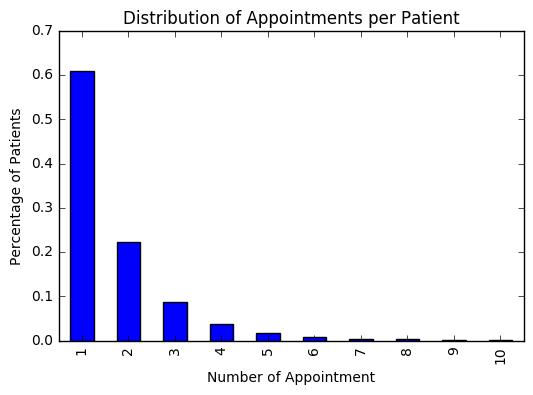

In [23]:
#Visualization distribution of Number of Appointments per Patient
short_distribution_appointments.plot(kind='bar')

plt.xlabel('Number of Appointment')
plt.ylabel('Percentage of Patients')
plt.title('Distribution of Appointments per Patient');


#### Answer: As we can see in the bar plot, 83% and therefore the majority of the patients have one or two appointments with the doctor in the timeframe of the dataset. This finding is tentative and needs to be verified with further datasets.

## Question 2: How many Patients are alcoholic, relative and absolute?

To start the exploration of the second question, we group the data to only Alcoholics (Alcoholism == True) and print it for verification.

In [24]:
## Grouping by Alcoholism == true
absolute_alcoholics = data[data['Alcoholism'] == 1]
absolute_alcoholics

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
46,137943696338,5615608,M,2016-04-25,2016-04-29,58,SÃO CRISTÓVÃO,0,1,0,1,0,1,No
131,47559375448498,5637150,M,2016-04-28,2016-04-29,29,PRAIA DO SUÁ,0,0,0,1,0,0,Yes
133,3587185996856,5580520,M,2016-04-14,2016-04-29,69,PRAIA DO SUÁ,0,0,1,1,0,0,No
186,73296611628432,5587737,M,2016-04-15,2016-04-29,66,REDENÇÃO,0,1,0,1,0,0,No
207,63597955332399,5642700,M,2016-04-29,2016-04-29,46,MARUÍPE,0,0,0,1,0,0,No
331,821863135212,5639649,F,2016-04-29,2016-04-29,23,SÃO CRISTÓVÃO,1,0,0,1,0,0,No
344,821863135212,5638396,F,2016-04-29,2016-04-29,23,SÃO CRISTÓVÃO,1,0,0,1,0,0,No
381,1462195166313,5555577,F,2016-04-07,2016-04-29,54,BONFIM,0,1,0,1,0,0,No
384,949327825479,5639387,M,2016-04-29,2016-04-29,63,DA PENHA,0,1,0,1,0,0,No
459,58566532175887,5640026,F,2016-04-29,2016-04-29,38,TABUAZEIRO,1,0,0,1,0,0,No


To answer the first part of the question, we can now call the .nunique() function and assign the variable number_alcoholics to the result.

In [25]:
## Counting the absolute number of Alcohol Patients
number_alcoholics = absolute_alcoholics['PatientId'].nunique()
number_alcoholics

1506

To verify this result, we group Non-Alcoholics (Alcoholism == False) and print it.

In [26]:
## Grouping by Alcoholism = false (for checking)
absolute_alcoholics = data[data['Alcoholism'] == 0]
absolute_alcoholics

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,95985133231274,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No
6,733688164476661,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3449833394123,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,56394729949972,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No
9,78124564369297,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No


We count the non-alcoholic patients by calling the .nunique() function and assign the variable number_non_alcoholics to the result.

In [27]:
## Counting the absolute number of non-alcoholic patients
number_non_alcoholics = absolute_alcoholics['PatientId'].nunique()
number_non_alcoholics

60793

To complete the result verification by adding the absolute numbers of alcoholics and non-alcoholics. The sum is equal to the number of unique patients, the output 'True' proves this.

In [28]:
## Plausibility Check for Absolute Numbers. 
number_non_alcoholics + number_alcoholics == unique_patients

True

We now have found and verified the absolute number of alcoholics. To answer the second half of our questions, we divide the number of alcoholics through the number of unique patients. The result is 2.42%. Research shows that the Brazil prevalence of alcohol dependence is 2.8%, 2010 (WHO), which means our dataset is very close to the national average.

In [29]:
## Percentage of alcoholic patients and formatting into percentage. 
percentage_alcoholic_patients = number_alcoholics / (1.0 * unique_patients)
'{:,.2%}'.format(percentage_alcoholic_patients)

'2.42%'

We use a pie chart to visualize the percentage of alcoholic patients.

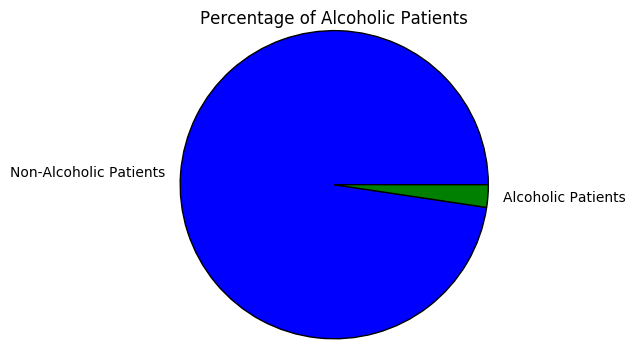

In [30]:
##Visualizing the percentage of alcoholic patients
percentage_alcoholic_patients

plt.pie([1, percentage_alcoholic_patients], labels = ['Non-Alcoholic Patients', 'Alcoholic Patients'])
plt.axis('equal')
plt.title('Percentage of Alcoholic Patients');

#### Answer: Of the patients in the dataset, 2.42% are alcoholics. This is slightly below the national average of 2.8% in Brazil (Source: WHO, 2010). In relative numbers of the dataset, this means 1506 patients are alcoholic out of 60793 unique patients that had a total of 110527 appointments. 

## Question 3: Does alcoholism influence no-show appointments?


Now that we have a good understanding of our dataset and the alcoholics variable, we come to the main research question: The influence of alcoholism to the no-show appointments. We group by those two variables and count the results.

In [31]:
## Grouped of people with Alcoholism and if they showed up or not.

alcoholic_counts = data.groupby(['Alcoholism', 'No-show']).count()['Age']
alcoholic_counts

Alcoholism  No-show
0           No         85525
            Yes        21642
1           No          2683
            Yes          677
Name: Age, dtype: int64

The previous step gave us the results in absolute numbers. To compare the two groups we calculate the percentage by dividing the patients that showed up to the appointment by the patients that didn't show up. This is done for both groups, alcoholic and not_alcoholic.
The result is very similar for both groups, 25% of patients do not show up to their appointment.

In [32]:
## Calculating the percentage of no-shows among alcoholics and non-alcoholics

not_alcoholic = (1.0 *alcoholic_counts[0, 'Yes']) / alcoholic_counts[0, 'No']
alcoholic = (1.0 * alcoholic_counts[1, 'Yes']) / alcoholic_counts[1, 'No']
print not_alcoholic
print alcoholic

0.253048816136
0.252329481923


Since the difference is so minuscule, we visualize it by plotting a bar diagram with the title "Number of Alcoholic and Non-Alcoholic no-shows".

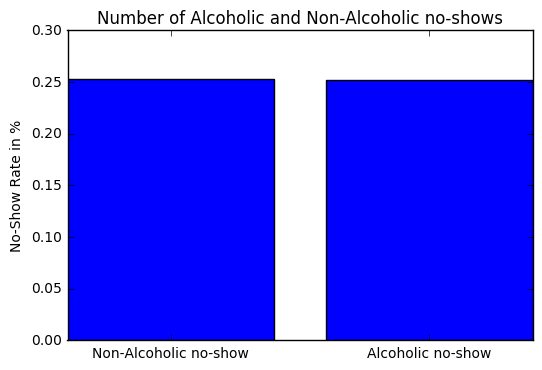

In [33]:
##Visualizing how the alcoholic attribute influences showing up.

objects = ('Non-Alcoholic no-show', 'Alcoholic no-show')
y_pos = np.arange(len(objects))
performance = [not_alcoholic,alcoholic]
 
plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, objects)
plt.ylabel('No-Show Rate in %')
plt.title('Number of Alcoholic and Non-Alcoholic no-shows')

#### Answer: Being alcoholic shows no correlation with the no-show rate of doctor appointments.  This finding is tentative and needs to be verified with further datasets.

# Conclusion:

This research on the dataset was done to get an understanding of the importance of alcoholism of patients. All questions asked in the beginning were successfully answered. The dataset was in a very good state and no missing values or duplicates were found. PatientID was converted to integer format and the date variables were formatted. Data wrangling was completed after proving that data entries for 'Alcoholism' and 'no-show' were consistent.

1. How is the distribution of appointments per patient? 
This questions enables us to better understand the type of patients. 83% and therefore the majority of the patients have one or two appointments with the doctor in the timeframe of the dataset. This points to mostly acute treatments as opposed to repeated treatment of chronic illnesses in the patients of the dataset. This finding is tentative and needs to be verified with further statistical tests.

2. How many patients are alcoholic, relative and absolute?
Of the patients in the dataset, 2.42% are alcoholics. This is slightly below the national average of 2.8% in Brazil (Source: WHO, 2010) but points to a sufficient sample size of the dataset. In relative numbers of the dataset, this means 1506 patients are alcoholic out of 60793 unique patients that had a total of 110527 appointments.

3. Does alcoholism influence no-show appointments?
Both groups of non-alcoholic and alcoholics have a similar percentage (25.3% vs 25.2%) of not showing up to the doctors appointment. Being alcoholic therefore shows no correlation with the no-show rate of doctor appointments. This finding is tentative and needs to be verified with further datasets.

Summary: This research project found no indicators of any positive or negative correlation between alcoholism and no-show rate at medical appointments. This finding is tentative, further analysis should be conducted to see if other variables of the dataset have a correlation.